In [3]:
import evalFunctions as ef
import os
import json
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pyvis.network import Network
import networkx as nx

In [4]:
stop_words = set(stopwords.words('english'))

pathlist = []
for i in range(0,7):
    filename_source = 'sentenceswithnames'+str(i)+'.txt'
    filepath_source = os.path.join('Data','RESULTS',filename_source)
    filename_target = 'unigram_mtx'+str(i)+'.txt'
    filepath_target = os.path.join('Data','RESULTS',filename_target)
    pathlist.append(filepath_target)  
    if not os.path.exists(filepath_target):
        print('not exists')
        # Statistischee Analysen gesamter Text
        with open(filepath_source,'r',encoding='utf-8') as f:
            content = f.read()
        # Sätze erstellen
        sents = nltk.sent_tokenize(content) # Output is a list of sentences
        print(len(sents))
        # print(type(sents))
        # print(sents)
        unigrammtx = ef.unigramMatrix(sents)
        print(len(unigrammtx))
        with open(filepath_target,'w',encoding='utf-8') as f:
            for word in unigrammtx:
                f.write(word)
                f.write('\n')

filepath_master = os.path.join('Data','RESULTS','unigram_mtx.txt')
# if os.path.exists(filepath_master):
if not os.path.exists(filepath_master):
    print(pathlist)
    with open(filepath_master,'a') as f:
        for filepath in pathlist:
            with open(filepath,'r') as input:
                f.write(input.read())

In [5]:
with open(os.path.join('Data','RESULTS','unigram_mtx.txt'),'r',encoding='utf-8') as f:
    content = f.readlines() #.replace('\n','')
ngram_mtx = []
for line in content:
    ngram_mtx.append(line.replace('\n',''))

print(len(ngram_mtx))

630316


In [6]:
# Filter auf die Unigramme
uallmtx = ef.ngramFilter(ngram_mtx)

print(type(uallmtx))

<class 'list'>


In [7]:

# Ngramme initialisieren
# print('unimtx')
# unimtx_freq,mtx_bigram = ef.initNgrams(unigrammtx)
print('uallmtx')
uall_fmtxreq,uallmtx_bigram = ef.initNgrams(uallmtx)
# print('unamesmtx')
# unamesmtx_freq,unamesmtx_bigram = ef.initNgrams(unamesmtx)
# print('uadmtx')
# uadmtx_freq,uadmtx_bigram = ef.initNgrams(uadmtx)


# print(uallmtx_bigram)

uallmtx


len connection
7199


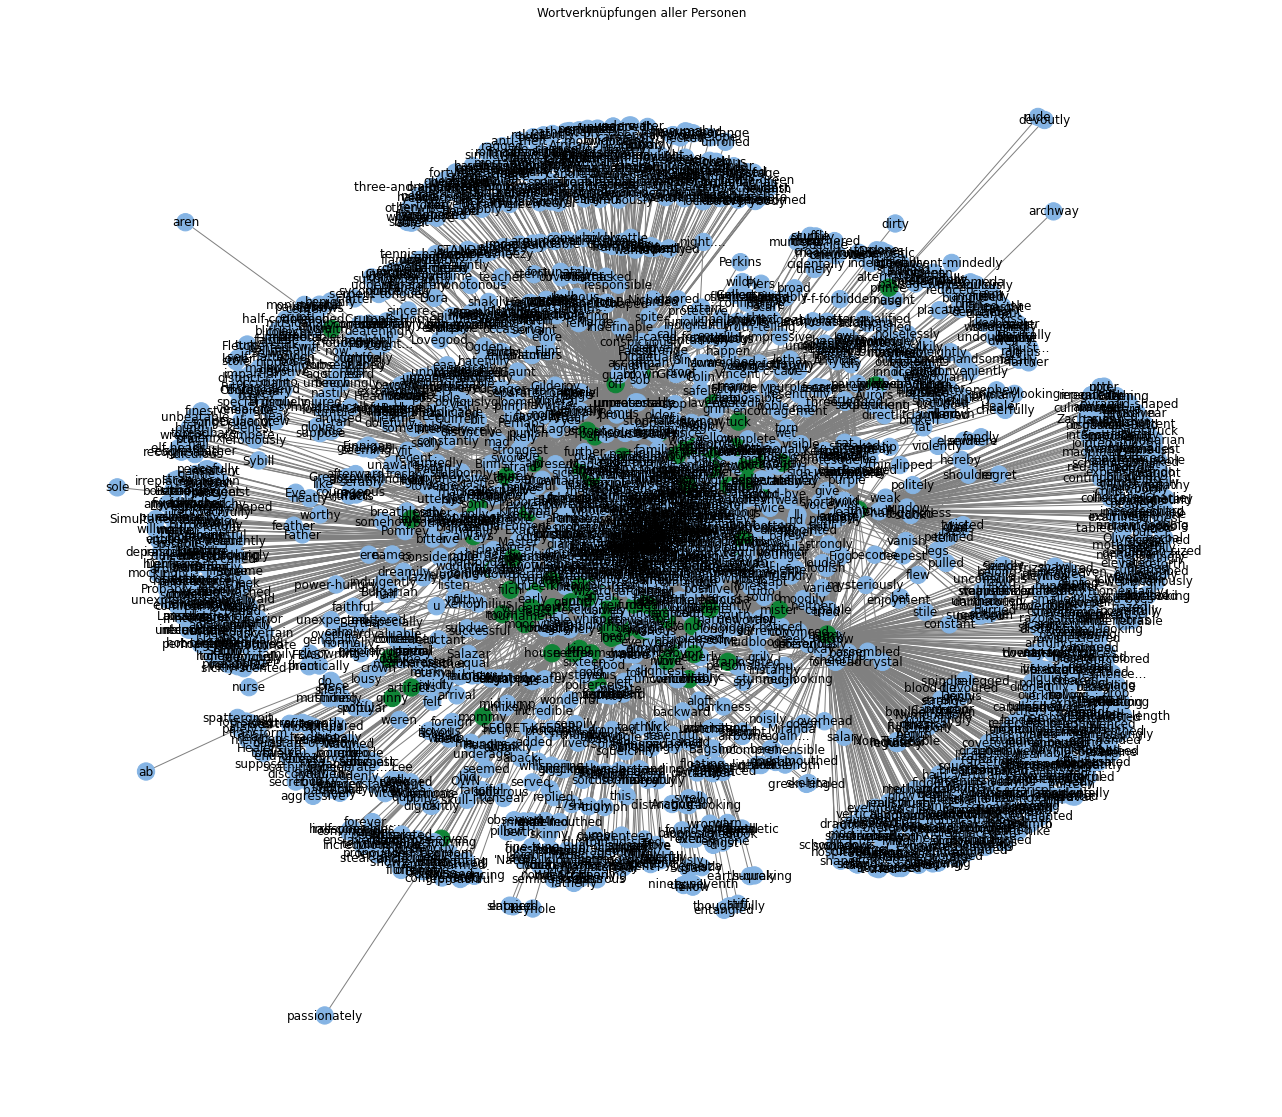

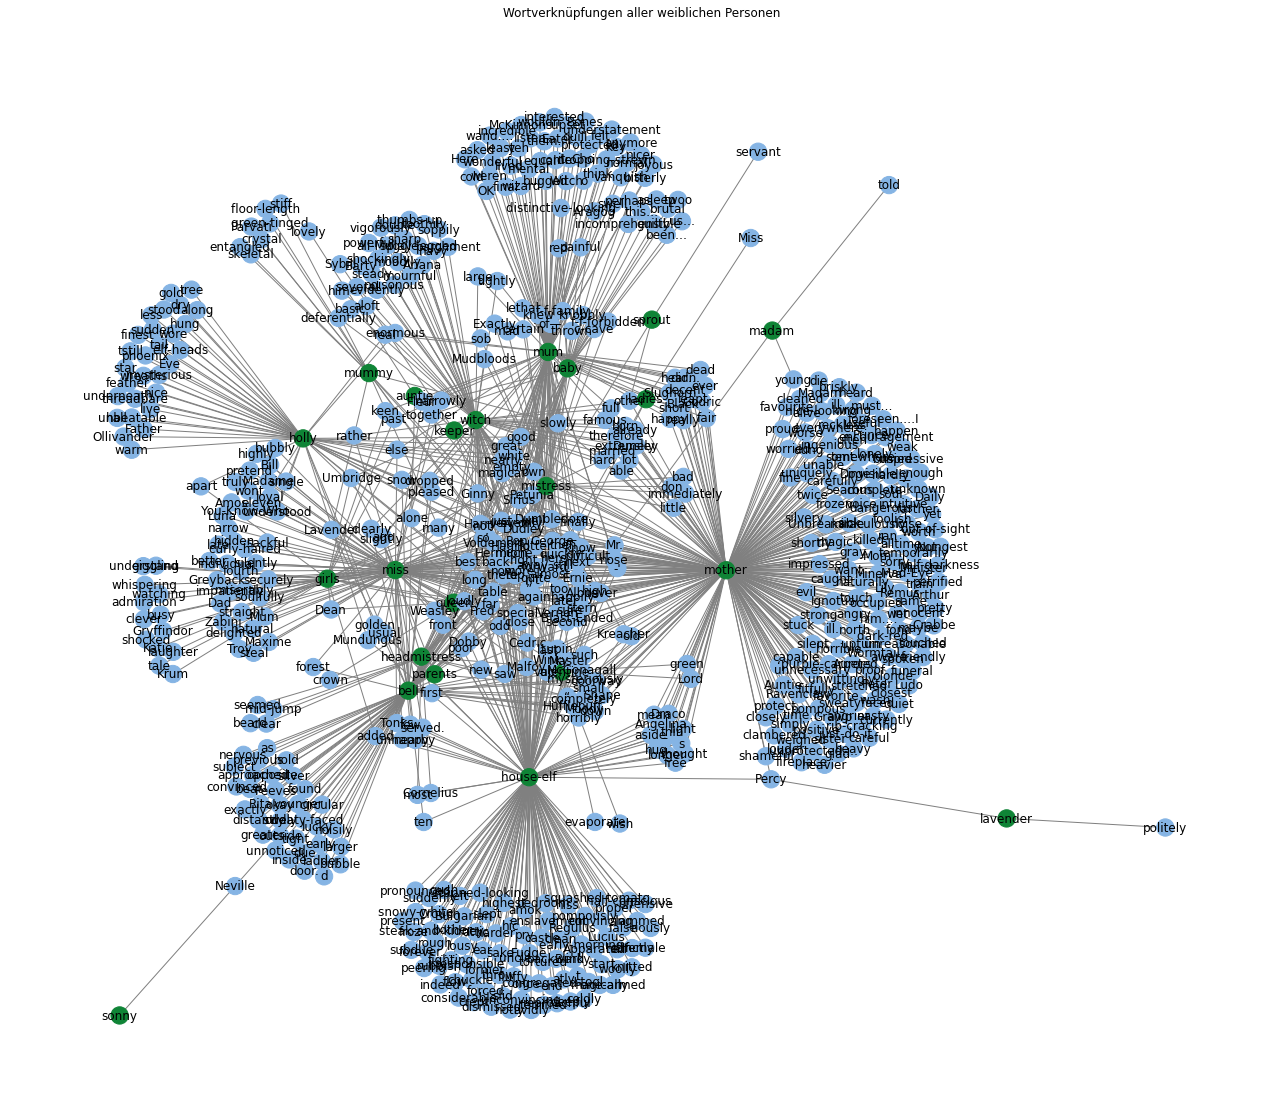

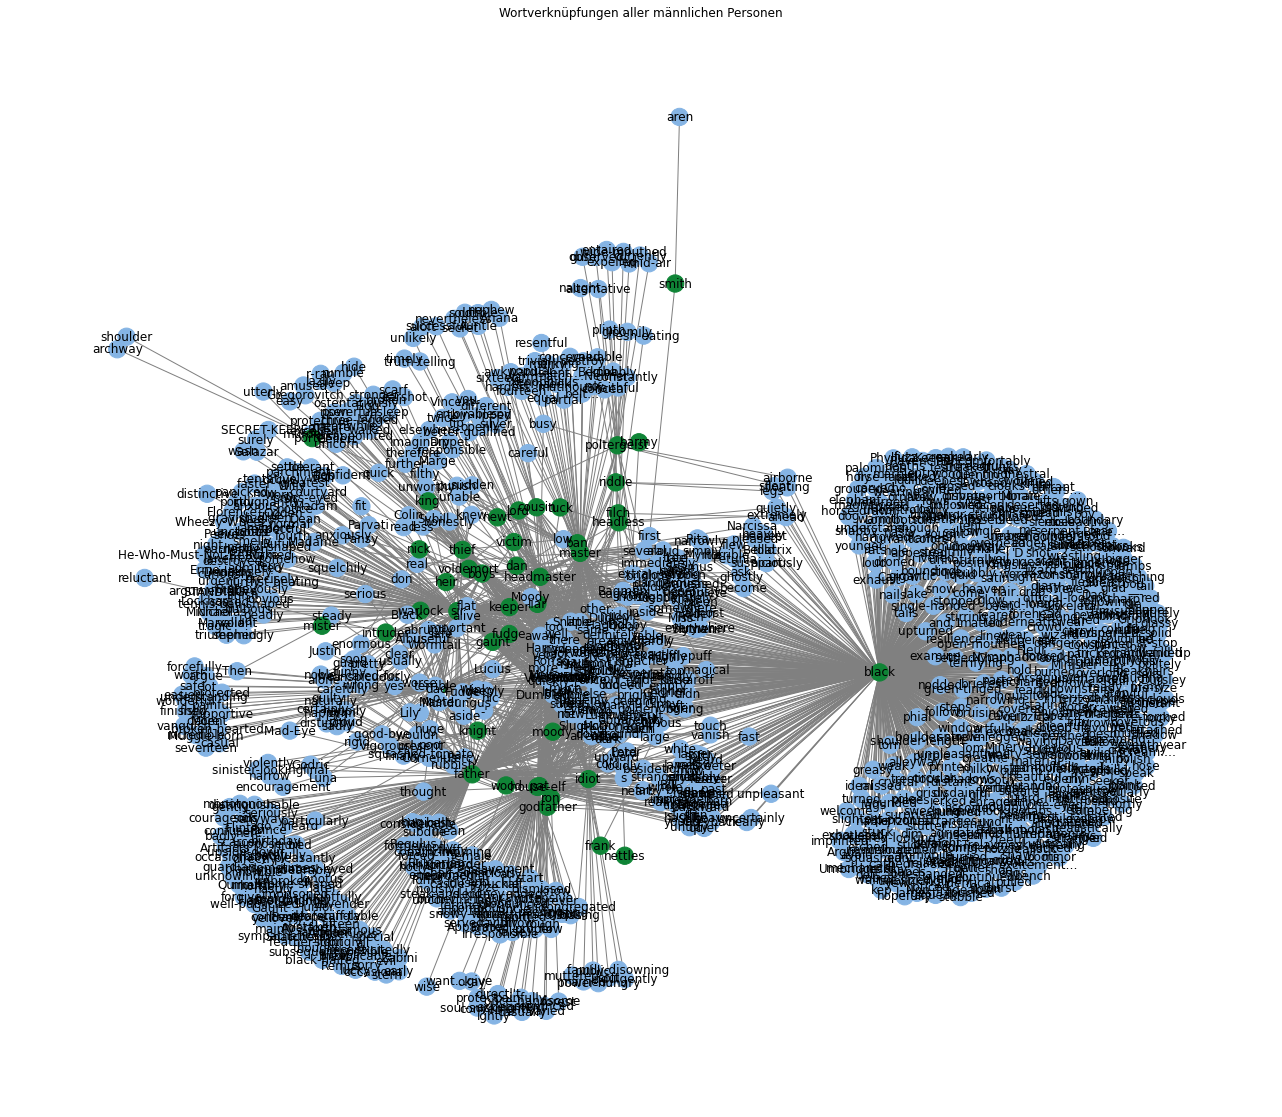

In [8]:
def createNetworkGraph(bigram):
    # print('len bigram')
    # print(len(bigram))
    
    # Gewichtung
    weight = {}
    # Tuple-Dictionaries
    connection = {}
    connection_f = {}
    connection_m = {}
    # Filter values
    fv_names, fv_adv, fv_adj, female, male, res = ef.getFilterValues(1,0,0,1,1) # funktionuggelt
    # print(fv_names) # funktionuggelt
    # Graphen
    g = nx.Graph()
    g_f = nx.Graph()
    g_m = nx.Graph()
    # Kennzahlen
    weight_of_nodes = []
    # Farben Variablen
    lblue = '#85B4E4'
    dgreen = '#0F8436'
    for tuple in bigram:
        weight = 0
        # print('1')
        # print(tuple[0])
        # print('2')
        # print(tuple[1])
        # TODO Gewichtung überprüfen
        # TODO Graphen umstrukturieren
        if tuple[0] in fv_names and not tuple[1] in fv_names:
            # print('criteria met')
            # weiblich
            if tuple[0] in female:
                connection_f.update({tuple:weight})
                weight = connection_f.get(tuple)
                weight += 1
                connection_f.update({tuple:weight})
            # männlich
            if tuple[0] in male:
                connection_m.update({tuple:weight})
                weight = connection_m.get(tuple)
                weight += 1
                connection_m.update({tuple:weight})
            # allgemein
            # print(connection)
            connection.update({tuple:weight})
            weight = connection.get(tuple)
            weight += 1
            connection.update({tuple:weight})
        if tuple[1] in fv_names and not tuple[0] in fv_names:
            # print('criteria met')
            # weiblich
            if tuple[0] in female:
                n_tuple = (tuple[1],tuple[0])
                connection_f.update({n_tuple:weight})
                weight = connection_f.get(n_tuple)
                weight += 1
                connection_f.update({n_tuple:weight})
            # männlich
            if tuple[0] in male:
                n_tuple = (tuple[1],tuple[0])
                connection_m.update({n_tuple:weight})
                weight = connection_m.get(n_tuple)
                weight += 1
                connection_m.update({n_tuple:weight})
            # allgemein
            n_tuple = (tuple[1],tuple[0])
            connection.update({n_tuple:weight})
            weight = connection.get(n_tuple)
            weight += 1
            connection.update({n_tuple:weight})
    print('len connection')
    print(len(connection))
    # Alle Personen-Graph
    color_map = []
    l_of_names = []
    l_of_words = []
    for key in connection:
        value = connection.get(key)
        g.add_node(key[0], cluster='noun')
        g.add_node(key[1], cluster='ad')
        g.add_edge(key[1],key[0],weight=value)
        weight_of_nodes.append(value)
        # Color-Mapping
        if key[1] in fv_names: # Paar aus Namen
            # Name 1 bereits erfasst?
            if not key[0] in l_of_names: # Wenn nein
                color_map.append(dgreen) # TODO Farbe ändern
                l_of_names.append(key[0])
            # Name 2 bereits erfasst?
            if not key[1] in l_of_names: # Wenn nein
                color_map.append(dgreen)
                l_of_names.append(key[1])
        else: # nur 1 Name
            if not key[0] in l_of_names:
                color_map.append(dgreen)
                l_of_names.append(key[0])
            #Color-Mapping für alle anderen Wörter
            if not key[1] in l_of_words: 
                color_map.append(lblue)
                l_of_words.append(key[1])
    '''
    # Reciprocity(undirected)
    rec = nx.overall_reciprocity(g)
    # Attribut-Assortivität-Koeffizient
    aac = nx.attribute_assortativity_coefficient(g,"cluster")
    # Grad-Assortivität-Koeffizient
    dac = nx.degree_assortativity_coefficient(g)
    # Durchschnitts-Nachbargrad
    andeg = nx.average_neighbor_degree(g)
    # Generalized Degree
    gdeg = nx.generalized_degree(g)
    # Diameter
    dia = nx.diameter(g)
    # Eccentricity
    ecc = nx.eccentricity(g)
    # Average Node-Connectivity
    anc = nx.average_node_connectivity(g)
    ec = nx.edge_connectivity(g)
    # Cliques
    clique = nx.find_cliques(g)
    n_clique = nx.graph_number_of_cliques(g)
    # # Transitivity
    # trans = nx.transitivity(g)
    # # Clustering
    # clu = nx.clustering(g)
    # # Average Clustering
    # avgcluster = nx.average_clustering(g)
    title = f"Wortverknüpfungen aller Personen\nAssortivitätskoeffizient: {aac}\nReciprocity: {rec}\n"
    title += f"Attribut-Assortivität-Koeffizient: {aac}\nGrad-Assortivität-Koeffizient: {dac}\n"
    title += f"Durchschnitts-Nachbargrad: {andeg}\nGeneralized Degree: {gdeg}\n"
    title += f"Diameter: {dia}\nEccentricity: {ecc}\n"
    title += f"Average Node-Connectivity: {anc}\nAverage Edge-Connectivity{ec}\n"
    title += f"Clique: {clique}\nAnzahl an Cliquen: {n_clique}"
    '''
    # Kennzahlen und Algos
    # print(weight_of_nodes)
    # Graphen darstellen
    fig = plt.figure(figsize=(50,20))
    subax1 = plt.subplot(122)
    nx.draw(g, node_color=color_map, edge_color ='grey', with_labels=True)
    subax1.set_title('Wortverknüpfungen aller Personen')
    # plt.savefig('wordconnectivity_all.png')
    # Frauen-Graph    
    color_map = []
    l_of_names = []
    l_of_words = []
    weight_of_nodes = []
    for key in connection_f:
        value = connection_f.get(key)
        g_f.add_node(key[0], cluster='noun')
        g_f.add_node(key[1], cluster='ad')
        g_f.add_edge(key[0],key[1],weight=value)
        weight_of_nodes.append(value)
        # Color-Mapping
        if key[1] in fv_names: # Paar aus Namen
            # Name 1 bereits erfasst?
            if not key[0] in l_of_names: # Wenn nein
                color_map.append(dgreen) # TODO Farbe ändern
                l_of_names.append(key[0])
            # Name 2 bereits erfasst?
            if not key[1] in l_of_names: # Wenn nein
                color_map.append(dgreen)
                l_of_names.append(key[1])
        else: # nur 1 Name
            if not key[0] in l_of_names:
                color_map.append(dgreen)
                l_of_names.append(key[0])
            #Color-Mapping für alle anderen Wörter
            if not key[1] in l_of_words: 
                color_map.append(lblue)
                l_of_words.append(key[1])
    '''
    # Reciprocity(undirected)
    rec_f = nx.overall_reciprocity(g)
    # Attribut-Assortivität-Koeffizient
    aac_f = nx.attribute_assortativity_coefficient(g,"cluster")
    # Grad-Assortivität-Koeffizient
    dac_f = nx.degree_assortativity_coefficient(g)
    # Durchschnitts-Nachbargrad
    andeg_f = nx.average_neighbor_degree(g)
    # Generalized Degree
    gdeg_f = nx.generalized_degree(g)
    # Diameter
    dia_f = nx.diameter(g)
    # Eccentricity
    ecc_f = nx.eccentricity(g)
    # Average Node-Connectivity
    anc_f = nx.average_node_connectivity(g)
    ec_f = nx.edge_connectivity(g)
    # Cliques
    clique_f = nx.find_cliques(g)
    n_clique_f = nx.graph_number_of_cliques(g)
    # # Transitivity
    # trans = nx.transitivity(g)
    # # Clustering
    # clu = nx.clustering(g)
    # # Average Clustering
    # avgcluster = nx.average_clustering(g)
    title_f = f"Wortverknüpfungen aller Personen\nAssortivitätskoeffizient: {aac_f}\nReciprocity: {rec_f}\n"
    title_f += f"Attribut-Assortivität-Koeffizient: {aac_f}\nGrad-Assortivität-Koeffizient: {dac_f}\n"
    title_f += f"Durchschnitts-Nachbargrad: {andeg_f}\nGeneralized Degree: {gdeg_f}\n"
    title_f += f"Diameter: {dia_f}\nEccentricity: {ecc_f}\n"
    title_f += f"Average Node-Connectivity: {anc_f}\nAverage Edge-Connectivity{ec_f}\n"
    title_f += f"Clique: {clique_f}\nAnzahl an Cliquen: {n_clique_f}"
    '''
    # Kennzahlen & Algos
    # print(weight_of_nodes)
    fig = plt.figure(figsize= (50,20))
    subax1 = plt.subplot(122)
    nx.draw(g_f, node_color=color_map, edge_color ='grey', with_labels=True)
    subax1.set_title('Wortverknüpfungen aller weiblichen Personen')
    # plt.savefig('wordconnectivity_women.png')
    # Männer-Graph
    color_map = []
    l_of_names = []
    l_of_words = []
    weight_of_nodes = []
    for key in connection_m:
        value = connection_m.get(key)
        g_m.add_node(key[0], cluster='noun', color='red')
        g_m.add_node(key[1], cluster='ad', color='red')
        g_m.add_edge(key[0],key[1],weight=value)
        weight_of_nodes.append(value)
    # Color-Mapping
        if key[1] in fv_names: # Paar aus Namen
            # Name 1 bereits erfasst?
            if not key[0] in l_of_names: # Wenn nein
                color_map.append(dgreen)
                l_of_names.append(key[0])
            # Name 2 bereits erfasst?
            if not key[1] in l_of_names: # Wenn nein
                color_map.append(dgreen)
                l_of_names.append(key[1])
        else: # nur 1 Name
            if not key[0] in l_of_names:
                color_map.append(dgreen)
                l_of_names.append(key[0])
            #Color-Mapping für alle anderen Wörter
            if not key[1] in l_of_words: 
                color_map.append(lblue)
                l_of_words.append(key[1])
    '''
    # Reciprocity(undirected)
    rec_m = nx.overall_reciprocity(g)
    # Attribut-Assortivität-Koeffizient
    aac_m = nx.attribute_assortativity_coefficient(g,"cluster")
    # Grad-Assortivität-Koeffizient
    dac_m = nx.degree_assortativity_coefficient(g)
    # Durchschnitts-Nachbargrad
    andeg_m = nx.average_neighbor_degree(g)
    # Generalized Degree
    gdeg_m = nx.generalized_degree(g)
    # Diameter
    dia_m = nx.diameter(g)
    # Eccentricity
    ecc_m = nx.eccentricity(g)
    # Average Node-Connectivity
    anc_m = nx.average_node_connectivity(g)
    ec_m = nx.edge_connectivity(g)
    # Cliques
    clique_m = nx.find_cliques(g)
    n_clique_m = nx.graph_number_of_cliques(g)
    # # Transitivity
    # trans = nx.transitivity(g)
    # # Clustering
    # clu = nx.clustering(g)
    # # Average Clustering
    # avgcluster = nx.average_clustering(g)
    title_m = f"Wortverknüpfungen aller Personen\nAssortivitätskoeffizient: {aac_m}\nReciprocity: {rec_m}\n"
    title_m += f"Attribut-Assortivität-Koeffizient: {aac_m}\nGrad-Assortivität-Koeffizient: {dac_m}\n"
    title_m += f"Durchschnitts-Nachbargrad: {andeg_m}\nGeneralized Degree: {gdeg_m}\n"
    title_m += f"Diameter: {dia_m}\nEccentricity: {ecc_m}\n"
    title_m += f"Average Node-Connectivity: {anc_m}\nAverage Edge-Connectivity{ec_m}\n"
    title_m += f"Clique: {clique_m}\nAnzahl an Cliquen: {n_clique_m}"
    '''
    # Kennzahlen & Algos
    # print(weight_of_nodes)
    fig = plt.figure(figsize= (50,20))
    subax1 = plt.subplot(122)
    nx.draw(g_m, node_color=color_map, edge_color ='grey', with_labels=True)
    subax1.set_title('Wortverknüpfungen aller männlichen Personen')
    # plt.savefig('wordconnectivity_men.png')
    return g, g_f, g_m

# wordnet = nltk.pywordnet()

graph_all, graph_female, graph_male = createNetworkGraph(uallmtx_bigram)


In [9]:
'''
def calcGraphMetrics(graph):
    # Reciprocity(undirected)
    rec = nx.overall_reciprocity(graph)
    # Attribut-Assortivität-Koeffizient
    aac = nx.attribute_assortativity_coefficient(graph,"cluster")
    # Grad-Assortivität-Koeffizient
    dac = nx.degree_assortativity_coefficient(graph)
    # Durchschnitts-Nachbargrad
    andeg = nx.average_neighbor_degree(graph)
    # Generalized Degree
    gdeg = nx.generalized_degree(graph)
    # Diameter
    dia = nx.diameter(graph)
    # Eccentricity
    ecc = nx.eccentricity(graph)
    # Average Node-Connectivity
    anc = nx.average_node_connectivity(graph)
    ec = nx.edge_connectivity(graph)
    # Cliques
    clique = nx.find_cliques(graph)
    n_clique = nx.graph_number_of_cliques(graph)
    # # Transitivity
    # trans = nx.transitivity(graph)
    # # Clustering
    # clu = nx.clustering(graph)
    # # Average Clustering
    # avgcluster = nx.average_clustering(graph)
    print(f'Assortivitätskoeffizient: {aac_m}')
    print(f'Reciprocity: {rec_m}')
    print(f'Attribut-Assortivität-Koeffizient: {aac_m}')
    print(f'Grad-Assortivität-Koeffizient: {dac_m}')
    print(f'Durchschnitts-Nachbargrad: {andeg_m}')
    print(f'Generalized Degree: {gdeg_m}')
    print(f'Diameter: {dia_m}')
    print(f'Eccentricity: {ecc_m}')
    print(f'Average Node-Connectivity: {anc_m}')
    print(f'Average Edge-Connectivity{ec_m}')
    print(f'Clique: {clique_m}')
    print(f'Anzahl an Cliquen: {n_clique_m}')
'''
'''
# calcGraphMetrics(graph_all)
# calcGraphMetrics(graph_female)
# calcGraphMetrics(graph_male)
'''

# Reciprocity(undirected)
rec = nx.overall_reciprocity(graph_all)
print(rec)
'''
# Attribut-Assortivität-Koeffizient
aac = nx.attribute_assortativity_coefficient(graph,"cluster")
# Grad-Assortivität-Koeffizient
dac = nx.degree_assortativity_coefficient(graph)
# Durchschnitts-Nachbargrad
andeg = nx.average_neighbor_degree(graph)
# Generalized Degree
gdeg = nx.generalized_degree(graph)
# Diameter
dia = nx.diameter(graph)
# Eccentricity
ecc = nx.eccentricity(graph)
# Average Node-Connectivity
anc = nx.average_node_connectivity(graph)
ec = nx.edge_connectivity(graph)
# Cliques
clique = nx.find_cliques(graph)
n_clique = nx.graph_number_of_cliques(graph)
# # Transitivity
# trans = nx.transitivity(graph)
# # Clustering
# clu = nx.clustering(graph)
# # Average Clustering
# avgcluster = nx.average_clustering(graph)
print(f'Assortivitätskoeffizient: {aac_m}')
print(f'Reciprocity: {rec_m}')
print(f'Attribut-Assortivität-Koeffizient: {aac_m}')
print(f'Grad-Assortivität-Koeffizient: {dac_m}')
print(f'Durchschnitts-Nachbargrad: {andeg_m}')
print(f'Generalized Degree: {gdeg_m}')
print(f'Diameter: {dia_m}')
print(f'Eccentricity: {ecc_m}')
print(f'Average Node-Connectivity: {anc_m}')
print(f'Average Edge-Connectivity{ec_m}')
print(f'Clique: {clique_m}')
print(f'Anzahl an Cliquen: {n_clique_m}')
'''

'\n# Attribut-Assortivität-Koeffizient\naac = nx.attribute_assortativity_coefficient(graph,"cluster")\n# Grad-Assortivität-Koeffizient\ndac = nx.degree_assortativity_coefficient(graph)\n# Durchschnitts-Nachbargrad\nandeg = nx.average_neighbor_degree(graph)\n# Generalized Degree\ngdeg = nx.generalized_degree(graph)\n# Diameter\ndia = nx.diameter(graph)\n# Eccentricity\necc = nx.eccentricity(graph)\n# Average Node-Connectivity\nanc = nx.average_node_connectivity(graph)\nec = nx.edge_connectivity(graph)\n# Cliques\nclique = nx.find_cliques(graph)\nn_clique = nx.graph_number_of_cliques(graph)\n# # Transitivity\n# trans = nx.transitivity(graph)\n# # Clustering\n# clu = nx.clustering(graph)\n# # Average Clustering\n# avgcluster = nx.average_clustering(graph)\nprint(f\'Assortivitätskoeffizient: {aac_m}\')\nprint(f\'Reciprocity: {rec_m}\')\nprint(f\'Attribut-Assortivität-Koeffizient: {aac_m}\')\nprint(f\'Grad-Assortivität-Koeffizient: {dac_m}\')\nprint(f\'Durchschnitts-Nachbargrad: {andeg_m}\'